# Terminal Velocity
by [Paulo Marques](http://pmarques.eu), 2013/09/23

---

This notebook discusses the <a href="http://en.wikipedia.org/wiki/Drag_(physics)">drag forces</a> exerted on a body when traveling through air.   


![](http://upload.wikimedia.org/wikipedia/en/8/89/Parachuters_in_hybrid_formation.jpg)  

A falling body is subject to two forces: a downward force, $\vec{F_g}$, due to gravity, and an upward force $\vec{F_a}$, due to air resistance. Let's consider a body with mass $m$. Assuming an upward oriented YY axis, the following applies:

$$ F_g = - g \cdot m $$

$$ F_a = - sgn(v) \cdot {1 \over 2} \rho C_D A v^2 $$

In these formulas, $m$ is the mass of the body, $\rho$ is the density of air ($\approx 1.2 Kg/m^3$), $g$ is the accelaration of gravity ($\approx 9.8 m/s^2$), $v$ is the velocity of the body, $C_D$ is the drag coeficient of the body and $A$ is its cross-section area. $sgn(x)$ is the sign function that given a number returns +1 for positives and -1 for negatives. In the formula it makes the force always contrary to the movement of the body.

Thus, the resulting force $\vec{F}$ experienced by the body is:

$$ F = - g \cdot m - sgn(v) \cdot {1 \over 2} \rho C_D A v^2 $$

Given that force is directly related to accelaration, and accelaration to velocity:

$$ v = \frac{dy}{dt} $$

$$ F = m \cdot \frac{dv}{dt} $$

substituting, we get this differencial equation:

$$ m \cdot \frac{dv}{dt} = - g \cdot m - sgn(v) \cdot {1 \over 2} \rho C_D A v^2 $$

In fact, this can be expressed as a system of differential equations in the form ${\bf f}' = {\bf g}({\bf f}, t)$:

$$ \begin{cases} \frac{dy}{dt} = v \\\\ \frac{dv}{dt} = -g - sgn(v) \cdot {1 \over 2} {\rho \over m} C_D A v^2 \end{cases} $$

---

So, let's simulate this with Python!

Let's start by importing some basic libraries:

In [1]:
%pylab inline
from scipy.integrate import odeint
from math import sqrt, atan

Populating the interactive namespace from numpy and matplotlib


We now define the initial conditions and constants of the problem.

In [2]:
# Constants 
g  = 9.8                # Accelaration of gravity
p  = 1.2                # Density of air

# Caracteristics of the problem
m  = 0.100              # A 100 g ball
r  = 0.10               # 10 cm radius
Cd = 0.5                # Drag coeficient for a small spherical object
y0 = 1000.0             # Initial height of the body (1000 m)
v0 = 10.0               # Initial velocity of the body (10 m/s^2, going up)
A  = math.pi*r**2       # Cross-section area of the body

As said, let's define a system of ordinary differential equations in its normal form ${\bf f}' = {\bf g}({\bf f}, t)$. (In the code bellow we substitute $g()$ for $gm()$ so that it doesn't clash with the acceleration of gravity constant - $g$).

In [3]:
sgn = lambda x: math.copysign(1, x)                     # Auxiliary function to calculate the sign of a number

def gm(f, t):
    (y, v) = f                                          # Extract y and v (i.e., dy/dt) from the f mapping
    
    dy_dt = v                                           # The differential equations
    dv_dt = -1.0*g - sgn(v)*(1./2.)*(p/m)*Cd*A*v**2
    
    return [dy_dt, dv_dt]                               # Return the derivatives

Let's define the conditions to numerically solve the problem, including a time vector:

In [4]:
# Initial conditions (position and velocity)
start = [y0, v0]

# Time vector (from 0 to 5 secs)
tf = 5.0 
t = linspace(0, tf, int(tf*100))

Now let's solve the equations numericaly and extract the corresponding $y(t)$ and $v(t)$:

In [5]:
f = odeint(gm, start, t)

y = f[:, 0]
v = f[:, 1]

Finally, we can plot the solution.

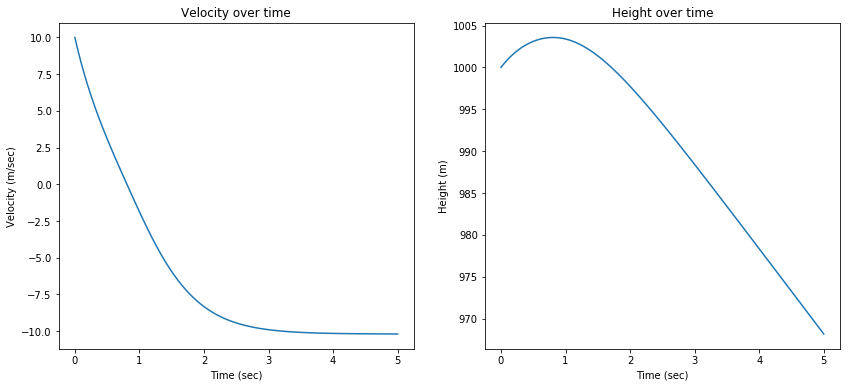

In [6]:
figure(figsize=(14, 6))
subplot(1, 2, 1, title='Velocity over time')
xlabel('Time (sec)')
ylabel('Velocity (m/sec)')
plot(t, v)
subplot(1, 2, 2, title='Height over time')
xlabel('Time (sec)')
ylabel('Height (m)')
plot(t, y)

As you can see, the velocity starts at 10 $m/s^2$, with the ball going up. Its velocity starts decreasing, goes to zero at max height, and then becomes negative as the ball starts coming down. After a while it reaches its maximum speed: terminal velocity. 

The theorerically [terminal velocity](http://en.wikipedia.org/wiki/Terminal_velocity), $V_t$, is:

$$ V_t = \sqrt{\frac{2 m g}{\rho A C_D}} $$

Calculating it is easy:

In [7]:
vt = sqrt( (2.*m*g) / (p*A*Cd) )
vt

10.197118685526071

Now, with our numerical simulation, the terminal velocity is:

In [8]:
# The terminal velocity
vt_numeric = abs(min(v))
vt_numeric

10.190673023395068

Now, that's what I call pretty neat!

---

# MIT LICENSE

> Copyright (C) 2013 Paulo Marques (pjp.marques@gmail.com)
>
> Permission is hereby granted, free of charge, to any person obtaining a copy of 
> this software and associated documentation files (the "Software"), to deal in
> the Software without restriction, including without limitation the rights to
> use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of
> the Software, and to permit persons to whom the Software is furnished to do so,
> subject to the following conditions:
>  
> The above copyright notice and this permission notice shall be included in all 
> copies or substantial portions of the Software.
> 
> THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
> IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS
> FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR
> COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER
> IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN 
> CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.